# 2017 장애인 실태조사 지체장애 건강관리 운동 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 원본 데이터 불러오기
raw_df = pd.read_excel('pydata/2017 장애인실태조사_뇌병변장애.xlsx', sheet_name = 1)
len(raw_df)

# 지체장애인만 불러오기
df = raw_df[raw_df['지체장애여부']==1]
df.head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
0,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.13207
1,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.13207
2,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.13207
3,2,2,2,21,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,0,28,444.377794,1.13207
8,2,3,3,21,NaN,NaN,1,NaN,NaN,3,...,0,0,0,0,0,0,0,43,444.377794,1.13207


In [3]:
df2=df[(df['가장 불편한부위']>=11)&(df['가장 불편한부위']<=19)]
df3=df[(df['가장 불편한부위']>=21)&(df['가장 불편한부위']<=27)]
df4=df[(df['가장 불편한부위']>=31)&(df['가장 불편한부위']<=38)]

conditionlist1 = [
    (df2['가장 불편한부위'] >=11) &(df2['가장 불편한부위']<=14) ,
    (df2["가장 불편한부위"]>=15) & (df2["가장 불편한부위"]<=19)]
conditionlist2 = [    
    (df3["가장 불편한부위"]>=21) & (df3["가장 불편한부위"]<=22),
    (df3["가장 불편한부위"]>=23) & (df3["가장 불편한부위"]<=24),
    (df3["가장 불편한부위"]>=25) & (df3["가장 불편한부위"]<=27)]
conditionlist3 = [    
    (df4["가장 불편한부위"]>=31) & (df4["가장 불편한부위"]<=34),
    (df4["가장 불편한부위"]>=35) & (df4["가장 불편한부위"]<=38)]
choicelist1 = ["[상지 절단]손목미만(손등, 손가락)~어깨 이상", "[하지 절단]양쪽 발가락~엉덩이 이상"]
choicelist2 = ["[상지 마비]상지 한쪽 or 양쪽","[하지 마비]하지 한쪽 or 양쪽", "[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비"]
choicelist3 = ["[상지 관절장애]어깨~손가락", "[하지 관절장애]고관절(엉덩이)~척추(디스크)"]
df2['가장 불편한 부위2'] = np.select(conditionlist1, choicelist1, default='')
df3['가장 불편한 부위2'] = np.select(conditionlist2, choicelist2, default='')
df4['가장 불편한 부위2'] = np.select(conditionlist3, choicelist3, default='')

<ipython-input-3-0b3e51cb5189>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['가장 불편한 부위2'] = np.select(conditionlist1, choicelist1, default='')
<ipython-input-3-0b3e51cb5189>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['가장 불편한 부위2'] = np.select(conditionlist2, choicelist2, default='')
<ipython-input-3-0b3e51cb5189>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

---
## 최근 1년 동안 건강관리를 위한 운동한 경험
### 지체장애 中 절단 장애
#### **운동 여부**

In [12]:
df2[['건강관리운동']].value_counts()

건강관리운동
1         256
2         180
dtype: int64

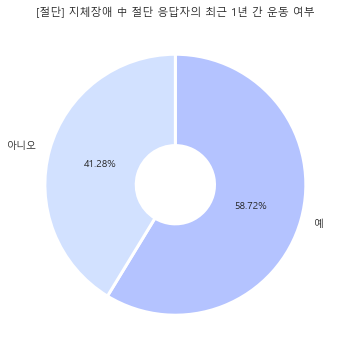

In [18]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

ratios = [256, 180]
labels=['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax.set_title('[절단] 지체장애 中 절단 응답자의 최근 1년 간 운동 여부', size=11)

# plt.savefig("pyvisual/지체장애/[절단]지체장애 中 절단 응답자의 최근 1년 간 운동 여부.png", dpi=300)
plt.show()

#### **운동주기**

In [14]:
df2.loc[df['건강관리운동']==1][['운동 주기']].value_counts()

운동 주기
1        130
2         64
3         37
4         15
5          8
6          2
dtype: int64

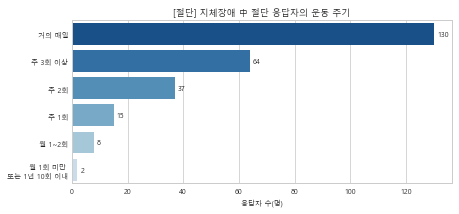

In [59]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 3)

palette = sns.color_palette("Blues", n_colors=7) 
palette.reverse()

splot = sns.countplot(data=df2.loc[df['건강관리운동']==1][['운동 주기']], y='운동 주기', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)

plt.yticks([0,1,2,3,4,5], ['거의 매일', '주 3회 이상', '주 2회', '주 1회', '월 1~2회', '월 1회 미만 \n또는 1년 10회 이내'])
plt.ylabel('')
plt.xlabel('응답자 수(명)', size = 7)
plt.xticks(size = 7)
plt.yticks(size = 7)
plt.title('[절단] 지체장애 中 절단 응답자의 운동 주기', size=9)
plt.gcf().subplots_adjust(left=0.24)

# plt.savefig("pyvisual/지체장애/절단/[절단]지체장애 中 절단 응답자의 운동 주기.png", dpi=300)
plt.show()

#### **운동장소**

In [24]:
place_df2 = df2.loc[df['건강관리운동']==1][['운동 장소 (1순위)', '운동 장소 (2순위)']]
place_df2.head()

,운동 장소 (1순위),운동 장소 (2순위)
60,2,0
120,1,0
121,2,0
122,2,5
207,2,5


In [26]:
group_df2 = place_df2.groupby(['운동 장소 (1순위)', '운동 장소 (2순위)'])[['운동 장소 (1순위)']].count().add_suffix('_Count').reset_index()
group_df2.head()

,운동 장소 (1순위),운동 장소 (2순위),운동 장소 (1순위)_Count
0,1,0,14
1,1,2,12
2,1,4,1
3,1,6,1
4,2,0,133


In [27]:
pivot_df2 = group_df2.pivot('운동 장소 (2순위)', '운동 장소 (1순위)', '운동 장소 (1순위)_Count')
pivot_df2.fillna(0, inplace=True)
# pivot_df.astype('int')
pivot_df2

운동 장소 (1순위),1,2,3,4,5,6,7,8
운동 장소 (2순위),,,,,,,,
0,14.0,133.0,5.0,9.0,7.0,7.0,0.0,4.0
1,0.0,24.0,1.0,1.0,1.0,0.0,0.0,1.0
2,12.0,0.0,0.0,3.0,4.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


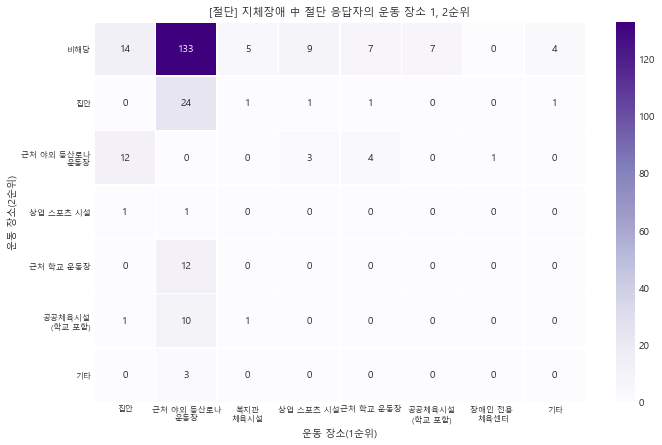

In [47]:
x_axis_labels = ['집안', '근처 야외 등산로나\n운동장', '복지관\n체육시설', '상업 스포츠 시설', '근처 학교 운동장', 
                 '공공체육시설\n(학교 포함)', '장애인 전용 \n체육센터', '기타'] # 1순위
y_axis_labels = ['비해당', '집안', '근처 야외 등산로나\n운동장', '상업 스포츠 시설', '근처 학교 운동장', 
                 '공공체육시설\n(학교 포함)', '기타'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

sns.heatmap(pivot_df2, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 10},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title('[절단] 지체장애 中 절단 응답자의 운동 장소 1, 2순위', size = 11)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('운동 장소(1순위)', size = 10)
ax.set_ylabel('운동 장소(2순위)', size = 10)

# plt.savefig("pyvisual/지체장애/절단/[절단]지체장애 中 절단 응답자의 운동 장소 1, 2순위.png", dpi=300)
plt.show()

#### **참여 운동 종목**

In [28]:
kinds_df2 = df2.loc[df['건강관리운동']==1][['참여 운동 종목 (1순위)', '참여 운동 종목 (2순위)']]
kinds_df2.head()
# kinds_df1[['참여 운동 종목 (2순위)']].value_counts()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위)
60,2,0
120,3,0
121,2,0
122,8,18
207,2,3


In [29]:
kinds_group_df2 = kinds_df2.groupby(['참여 운동 종목 (1순위)', '참여 운동 종목 (2순위)'])[['참여 운동 종목 (1순위)']].count().add_suffix('_Count').reset_index()
kinds_group_df2.head()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위),참여 운동 종목 (1순위)_Count
0,1,2,3
1,2,0,105
2,2,1,1
3,2,3,51
4,2,4,1


In [30]:
move_pivot_df2 = kinds_group_df2.pivot('참여 운동 종목 (2순위)', '참여 운동 종목 (1순위)', '참여 운동 종목 (1순위)_Count').fillna(0)
# move_pivot_df1.fillna(0, inplace=True)
# pivot_df.astype('int')
move_pivot_df2

참여 운동 종목 (1순위),1,2,3,4,6,7,8,9,10,12,13,14,15,17,18
참여 운동 종목 (2순위),,,,,,,,,,,,,,,
0,0.0,105.0,9.0,0.0,4.0,7.0,11.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,5.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,7.0,2.0,4.0,2.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,51.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


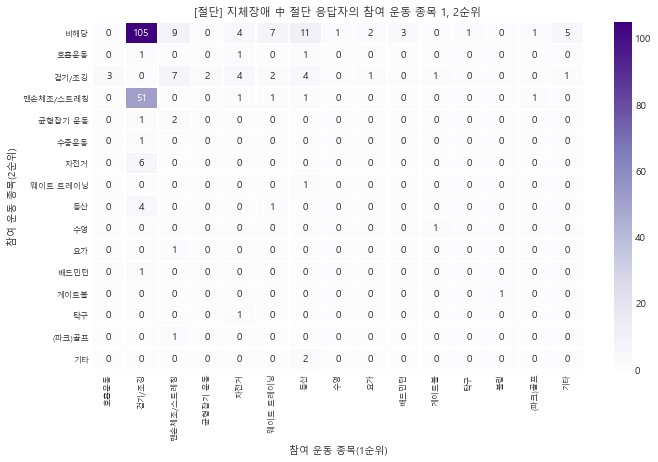

In [31]:
x_axis_labels = ['호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '자전거', '웨이트 트레이닝', '등산',
             '수영', '요가', '배드민턴', '게이트볼', '탁구', '볼링', '(파크)골프', '기타'] # 1순위
y_axis_labels = ['비해당', '호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '수중운동', '자전거', '웨이트 트레이닝', '등산',
            '수영', '요가', '배드민턴', '게이트볼', '탁구', '(파크)골프', '기타'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

sns.heatmap(move_pivot_df2, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 10}, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title('[절단] 지체장애 中 절단 응답자의 참여 운동 종목 1, 2순위', size = 11)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 90)
ax.set_xlabel('참여 운동 종목(1순위)', size = 10)
ax.set_ylabel('참여 운동 종목(2순위)', size = 10)

plt.gcf().subplots_adjust(bottom=0.19)
# plt.savefig("pyvisual/지체장애/절단/[절단]지체자애 中 절단 응답자의 참여 운동 종목 1, 2순위.png", dpi=300)
plt.show()

---
### 지체장애 中 마비 장애
#### **운동 여부**

In [39]:
df3[['건강관리운동']].value_counts()

건강관리운동
2         215
1         202
dtype: int64

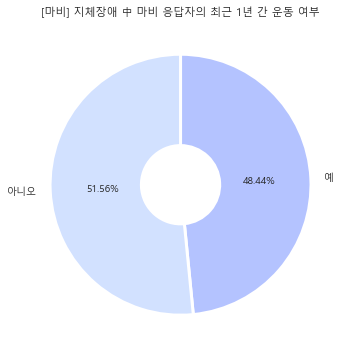

In [40]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

ratios = [202, 215]
labels=['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax.set_title('[마비] 지체장애 中 마비 응답자의 최근 1년 간 운동 여부', size=11)

# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 마비 응답자의 최근 1년 간 운동 여부.png", dpi=300)
plt.show()

#### **운동주기**

In [41]:
df3.loc[df['건강관리운동']==1][['운동 주기']].value_counts()

운동 주기
1        105
2         40
3         30
4         18
5          6
6          3
dtype: int64

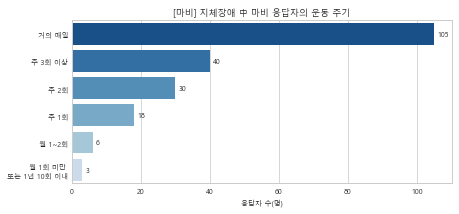

In [60]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 3)

palette = sns.color_palette("Blues", n_colors=7) 
palette.reverse()

splot = sns.countplot(data=df3.loc[df['건강관리운동']==1][['운동 주기']], y='운동 주기', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)

plt.yticks([0,1,2,3,4,5], ['거의 매일', '주 3회 이상', '주 2회', '주 1회', '월 1~2회', '월 1회 미만 \n또는 1년 10회 이내'])
plt.ylabel('')
plt.xlabel('응답자 수(명)', size = 7)
plt.xticks(size = 7)
plt.yticks(size = 7)
plt.title('[마비] 지체장애 中 마비 응답자의 운동 주기', size=9)
plt.gcf().subplots_adjust(left=0.24)

# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 마비 응답자의 운동 주기.png", dpi=300)
plt.show()

#### **운동장소**

In [43]:
place_df3 = df3.loc[df['건강관리운동']==1][['운동 장소 (1순위)', '운동 장소 (2순위)']]
place_df3.head()

,운동 장소 (1순위),운동 장소 (2순위)
39,6,0
44,1,0
57,2,0
79,2,0
116,2,0


In [44]:
group_df3 = place_df3.groupby(['운동 장소 (1순위)', '운동 장소 (2순위)'])[['운동 장소 (1순위)']].count().add_suffix('_Count').reset_index()
group_df3.head()

,운동 장소 (1순위),운동 장소 (2순위),운동 장소 (1순위)_Count
0,1,0,31
1,1,2,16
2,1,5,1
3,1,6,1
4,2,0,86


In [45]:
pivot_df3 = group_df3.pivot('운동 장소 (2순위)', '운동 장소 (1순위)', '운동 장소 (1순위)_Count')
pivot_df3.fillna(0, inplace=True)
# pivot_df.astype('int')
pivot_df3

운동 장소 (1순위),1,2,3,4,5,6,7,8
운동 장소 (2순위),,,,,,,,
0,31.0,86.0,8.0,3.0,5.0,6.0,1.0,5.0
1,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0
2,16.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


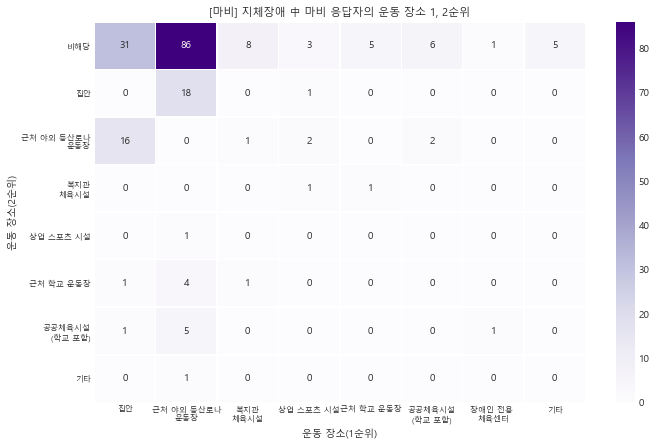

In [49]:
x_axis_labels = ['집안', '근처 야외 등산로나\n운동장', '복지관\n체육시설', '상업 스포츠 시설', '근처 학교 운동장', 
                 '공공체육시설\n(학교 포함)', '장애인 전용 \n체육센터', '기타'] # 1순위
y_axis_labels = ['비해당', '집안', '근처 야외 등산로나\n운동장', '복지관\n체육시설', '상업 스포츠 시설', '근처 학교 운동장', 
                 '공공체육시설\n(학교 포함)', '기타'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

sns.heatmap(pivot_df3, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 10},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title('[마비] 지체장애 中 마비 응답자의 운동 장소 1, 2순위', size = 11)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('운동 장소(1순위)', size = 10)
ax.set_ylabel('운동 장소(2순위)', size = 10)

# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 마비 응답자의 운동 장소 1, 2순위.png", dpi=300)
plt.show()

#### **참여 운동 종목**

In [32]:
kinds_df3 = df3.loc[df['건강관리운동']==1][['참여 운동 종목 (1순위)', '참여 운동 종목 (2순위)']]
kinds_df3.head()
# kinds_df1[['참여 운동 종목 (2순위)']].value_counts()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위)
39,7,0
44,3,0
57,2,0
79,2,3
116,2,0


In [33]:
kinds_group_df3 = kinds_df3.groupby(['참여 운동 종목 (1순위)', '참여 운동 종목 (2순위)'])[['참여 운동 종목 (1순위)']].count().add_suffix('_Count').reset_index()
kinds_group_df3.head()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위),참여 운동 종목 (1순위)_Count
0,1,0,2
1,1,2,1
2,2,0,80
3,2,3,32
4,2,4,2


In [34]:
move_pivot_df3 = kinds_group_df3.pivot('참여 운동 종목 (2순위)', '참여 운동 종목 (1순위)', '참여 운동 종목 (1순위)_Count').fillna(0)
# move_pivot_df1.fillna(0, inplace=True)
# pivot_df.astype('int')
move_pivot_df3

참여 운동 종목 (1순위),1,2,3,4,5,6,7,8,9,10,12,14,16,17,18
참여 운동 종목 (2순위),,,,,,,,,,,,,,,
0,2.0,80.0,25.0,1.0,1.0,11.0,5.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,3.0
2,1.0,0.0,3.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,32.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


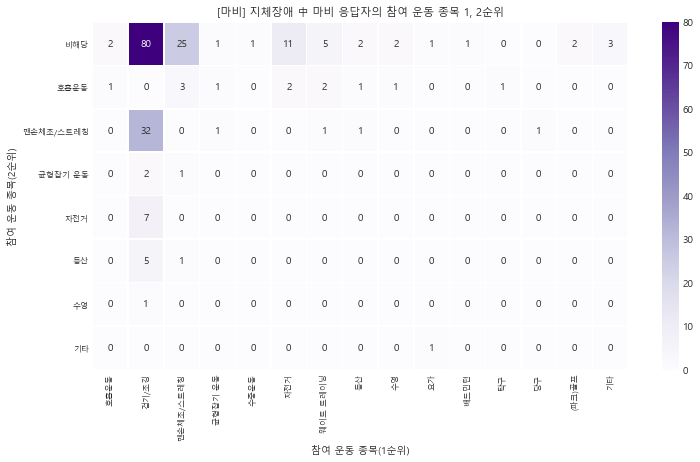

In [35]:
x_axis_labels = ['호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '수중운동', '자전거', '웨이트 트레이닝', '등산',
             '수영', '요가', '배드민턴', '탁구', '당구', '(파크)골프', '기타'] # 1순위
y_axis_labels = ['비해당', '호흡운동', '맨손체조/스트레칭', '균형잡기 운동', '자전거', '등산',
            '수영', '기타'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(12, 7)

sns.heatmap(move_pivot_df3, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 10}, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title('[마비] 지체장애 中 마비 응답자의 참여 운동 종목 1, 2순위', size = 11)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 90)
ax.set_xlabel('참여 운동 종목(1순위)', size = 10)
ax.set_ylabel('참여 운동 종목(2순위)', size = 10)

plt.gcf().subplots_adjust(bottom=0.19)
# plt.savefig("pyvisual/지체장애/마비/[마비]지체자애 中 마비 응답자의 참여 운동 종목 1, 2순위.png", dpi=300)
plt.show()

---
### 지체장애 中 관절장애
#### **운동 여부**

In [4]:
df4[['건강관리운동']].value_counts()

건강관리운동
1         1390
2          868
dtype: int64

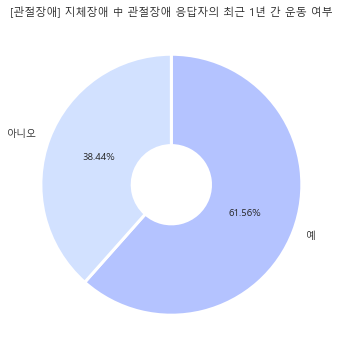

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

ratios = [1390, 868]
labels=['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax.set_title('[관절장애] 지체장애 中 관절장애 응답자의 최근 1년 간 운동 여부', size=11)

# plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 관절장애 응답자의 최근 1년 간 운동 여부.png", dpi=300)
plt.show()

#### **운동주기**

In [8]:
df4.loc[df['건강관리운동']==1][['운동 주기']].value_counts()

운동 주기
1        741
2        360
3        160
4         70
5         48
6         11
dtype: int64

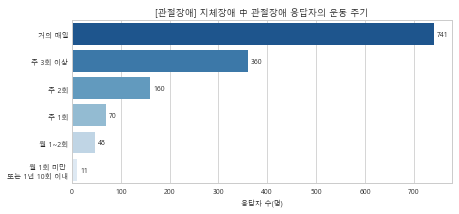

In [10]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 3)

palette = sns.color_palette("Blues", n_colors=6) 
palette.reverse()

splot = sns.countplot(data=df4.loc[df['건강관리운동']==1][['운동 주기']], y='운동 주기', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)

plt.yticks([0,1,2,3,4,5], ['거의 매일', '주 3회 이상', '주 2회', '주 1회', '월 1~2회', '월 1회 미만 \n또는 1년 10회 이내'])
plt.ylabel('')
plt.xlabel('응답자 수(명)', size = 7)
plt.xticks(size = 7)
plt.yticks(size = 7)
plt.title('[관절장애] 지체장애 中 관절장애 응답자의 운동 주기', size=9)
plt.gcf().subplots_adjust(left=0.24)

# plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 관절장애 응답자의 운동 주기.png", dpi=300)
plt.show()

#### **운동장소**

In [11]:
place_df4 = df4.loc[df['건강관리운동']==1][['운동 장소 (1순위)', '운동 장소 (2순위)']]
place_df4.head()

,운동 장소 (1순위),운동 장소 (2순위)
0,4,0
2,7,0
3,2,5
8,2,5
18,4,0


In [12]:
group_df4 = place_df4.groupby(['운동 장소 (1순위)', '운동 장소 (2순위)'])[['운동 장소 (1순위)']].count().add_suffix('_Count').reset_index()
group_df4.head()

,운동 장소 (1순위),운동 장소 (2순위),운동 장소 (1순위)_Count
0,1,0,97
1,1,2,68
2,1,3,1
3,1,4,3
4,1,5,4


In [13]:
pivot_df4 = group_df4.pivot('운동 장소 (2순위)', '운동 장소 (1순위)', '운동 장소 (1순위)_Count')
pivot_df4.fillna(0, inplace=True)
# pivot_df.astype('int')
pivot_df4

운동 장소 (1순위),1,2,3,4,5,6,7,8
운동 장소 (2순위),,,,,,,,
0,97.0,717.0,19.0,49.0,23.0,37.0,5.0,20.0
1,0.0,130.0,2.0,4.0,3.0,2.0,0.0,0.0
2,68.0,0.0,18.0,36.0,16.0,17.0,1.0,2.0
3,1.0,8.0,0.0,1.0,1.0,1.0,0.0,0.0
4,3.0,10.0,2.0,0.0,0.0,1.0,0.0,0.0
5,4.0,46.0,1.0,1.0,0.0,1.0,0.0,0.0
6,1.0,20.0,3.0,4.0,1.0,0.0,0.0,1.0
7,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
8,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0


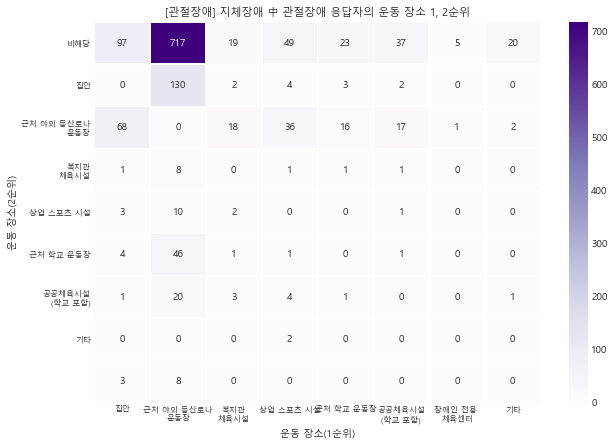

In [16]:
x_axis_labels = ['집안', '근처 야외 등산로나\n운동장', '복지관\n체육시설', '상업 스포츠 시설', '근처 학교 운동장', 
                 '공공체육시설\n(학교 포함)', '장애인 전용 \n체육센터', '기타'] # 1순위
y_axis_labels = ['비해당', '집안', '근처 야외 등산로나\n운동장', '복지관\n체육시설', '상업 스포츠 시설', '근처 학교 운동장', 
                 '공공체육시설\n(학교 포함)', '기타'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

sns.heatmap(pivot_df4, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 10},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title('[관절장애] 지체장애 中 관절장애 응답자의 운동 장소 1, 2순위', size = 11)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('운동 장소(1순위)', size = 10)
ax.set_ylabel('운동 장소(2순위)', size = 10)

plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 관절장애 응답자의 운동 장소 1, 2순위.png", dpi=300)
plt.show()

#### **참여 운동 종목**

In [17]:
kinds_df4 = df4.loc[df['건강관리운동']==1][['참여 운동 종목 (1순위)', '참여 운동 종목 (2순위)']]
kinds_df4.head()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위)
0,9,0
2,9,0
3,2,0
8,2,0
18,1,3


In [18]:
kinds_group_df4 = kinds_df4.groupby(['참여 운동 종목 (1순위)', '참여 운동 종목 (2순위)'])[['참여 운동 종목 (1순위)']].count().add_suffix('_Count').reset_index()
kinds_group_df4.head()

,참여 운동 종목 (1순위),참여 운동 종목 (2순위),참여 운동 종목 (1순위)_Count
0,1,0,7
1,1,2,13
2,1,3,3
3,1,8,1
4,2,0,631


In [19]:
move_pivot_df4 = kinds_group_df4.pivot('참여 운동 종목 (2순위)', '참여 운동 종목 (1순위)', '참여 운동 종목 (1순위)_Count').fillna(0)
# move_pivot_df1.fillna(0, inplace=True)
# pivot_df.astype('int')
move_pivot_df4

참여 운동 종목 (1순위),1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18
참여 운동 종목 (2순위),,,,,,,,,,,,,,,,,
0,7.0,631.0,67.0,1.0,9.0,34.0,22.0,25.0,15.0,8.0,5.0,8.0,2.0,2.0,0.0,1.0,8.0
1,0.0,20.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.0,0.0,34.0,2.0,7.0,23.0,20.0,5.0,16.0,5.0,2.0,5.0,1.0,0.0,1.0,1.0,4.0
3,3.0,216.0,0.0,1.0,1.0,6.0,7.0,1.0,4.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
4,0.0,5.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,35.0,5.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,10.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


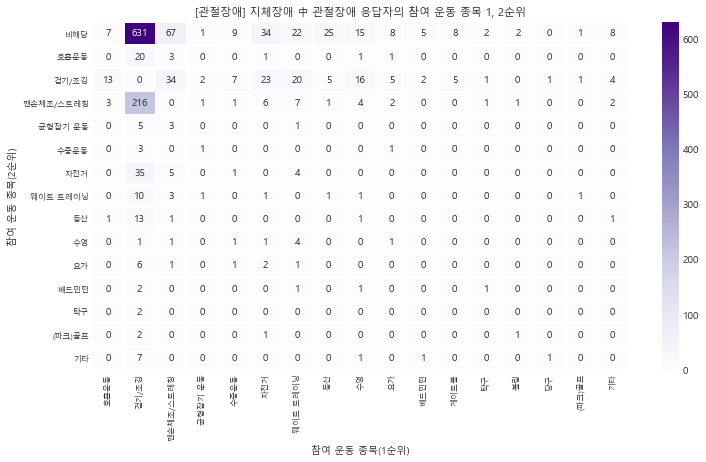

In [26]:
x_axis_labels = ['호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '수중운동', '자전거', '웨이트 트레이닝', '등산',
             '수영', '요가', '배드민턴', '게이트볼', '탁구', '볼링', '당구', '(파크)골프', '기타'] # 1순위
y_axis_labels = ['비해당', '호흡운동', '걷기/조깅', '맨손체조/스트레칭', '균형잡기 운동', '수중운동', '자전거', '웨이트 트레이닝', '등산',
             '수영', '요가', '배드민턴', '탁구', '(파크)골프', '기타'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(12, 7)

sns.heatmap(move_pivot_df4, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 10}, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title('[관절장애] 지체장애 中 관절장애 응답자의 참여 운동 종목 1, 2순위', size = 11)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 90)
ax.set_xlabel('참여 운동 종목(1순위)', size = 10)
ax.set_ylabel('참여 운동 종목(2순위)', size = 10)

plt.gcf().subplots_adjust(bottom=0.19)
plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 관절장애 응답자의 참여 운동 종목 1, 2순위.png", dpi=300)
plt.show()

---
### 가장 불편한 부위별 운동을 하지 않는 주된 이유
#### **절단**

In [52]:
no_move2 = pd.DataFrame(df2[['운동하지 않는 주된 이유', '가장 불편한 부위2']].loc[df2['건강관리운동'] == 2].groupby(['운동하지 않는 주된 이유', '가장 불편한 부위2'])['가장 불편한 부위2'].count()).add_suffix('_Count').reset_index()
no_move2

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count
0,1,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",5
1,2,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",69
2,2,[하지 절단]양쪽 발가락~엉덩이 이상,6
3,3,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",3
4,4,[하지 절단]양쪽 발가락~엉덩이 이상,1
5,5,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",6
6,5,[하지 절단]양쪽 발가락~엉덩이 이상,1
7,6,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",1
8,7,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",15
9,7,[하지 절단]양쪽 발가락~엉덩이 이상,19


In [53]:
no_reason = ['경제적 여건이 안됨', '시간 여유 없음', '시설접근 및 이동 어렵(보조인력 지원 포함)', '장애인 전문 지도자 없음', '원하는 프로그램 없음',
            '관련 정보 모름', '심한 장애', '관련 시설 주위 없음', '운동 필요 없거나 다른 활동 참여 중', '장애 상태 악화 우려', '주위 시선 불편',
            '운동에 필요한 적절한 보조기기 없음', '운동시설 등에서 받아주지 않음', '기타']

for i in range(len(no_reason)):
    no_move2.replace({'운동하지 않는 주된 이유': i+1}, {'운동하지 않는 주된 이유': no_reason[i]}, inplace=True)
no_move2.head()

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count
0,경제적 여건이 안됨,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",5
1,시간 여유 없음,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",69
2,시간 여유 없음,[하지 절단]양쪽 발가락~엉덩이 이상,6
3,시설접근 및 이동 어렵(보조인력 지원 포함),"[상지 절단]손목미만(손등, 손가락)~어깨 이상",3
4,장애인 전문 지도자 없음,[하지 절단]양쪽 발가락~엉덩이 이상,1
5,원하는 프로그램 없음,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",6
6,원하는 프로그램 없음,[하지 절단]양쪽 발가락~엉덩이 이상,1
7,관련 정보 모름,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",1
8,심한 장애,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",15
9,심한 장애,[하지 절단]양쪽 발가락~엉덩이 이상,19


In [93]:
no_move2_high = no_move2.loc[no_move2['가장 불편한 부위2']=='[상지 절단]손목미만(손등, 손가락)~어깨 이상'].sort_values(by='가장 불편한 부위2_Count', ascending = False)

no_move2_high['pct'] = round(no_move2_high['가장 불편한 부위2_Count'] / np.sum(no_move2_high['가장 불편한 부위2_Count'])*100, 2 )

no_move2_high.head()

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count,pct
1,시간 여유 없음,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",69,48.94
8,심한 장애,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",15,10.64
12,운동 필요 없거나 다른 활동 참여 중,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",14,9.93
10,관련 시설 주위 없음,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",10,7.09
20,기타,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",9,6.38


In [94]:
no_move2_low = no_move2.loc[no_move2['가장 불편한 부위2']=='[하지 절단]양쪽 발가락~엉덩이 이상'].sort_values(by='가장 불편한 부위2_Count', ascending = False)

no_move2_low['pct'] = round(no_move2_low['가장 불편한 부위2_Count'] / np.sum(no_move2_low['가장 불편한 부위2_Count'])*100, 2 )

no_move2_low.head()

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count,pct
9,심한 장애,[하지 절단]양쪽 발가락~엉덩이 이상,19,48.72
15,장애 상태 악화 우려,[하지 절단]양쪽 발가락~엉덩이 이상,8,20.51
2,시간 여유 없음,[하지 절단]양쪽 발가락~엉덩이 이상,6,15.38
4,장애인 전문 지도자 없음,[하지 절단]양쪽 발가락~엉덩이 이상,1,2.56
6,원하는 프로그램 없음,[하지 절단]양쪽 발가락~엉덩이 이상,1,2.56


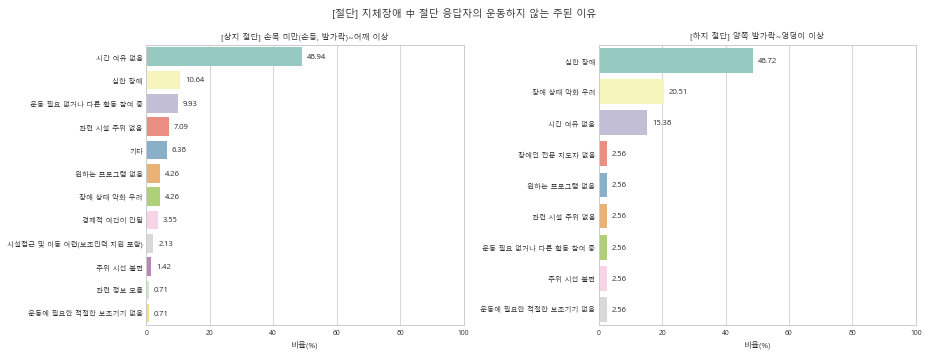

In [73]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(13, 5)

## ax1
colist1 = no_move2_high['운동하지 않는 주된 이유'].tolist()

splot1 = sns.barplot(data = no_move2_high, y = '운동하지 않는 주된 이유', x='pct', order = colist1, palette='Set3', ax=ax1)
ax1.set_title('[상지 절단] 손목 미만(손등, 발가락)~어깨 이상', size = 8)
ax1.set_ylabel('')
ax1.set_xlabel('비율(%)', size = 8)
ax1.tick_params(axis = 'x', labelsize =7)
ax1.tick_params(axis = 'y', labelsize =7)
ax1.set_xlim([0, 100])

for p in splot1.patches:
    ax1.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

## ax2
colist2 = no_move2_low['운동하지 않는 주된 이유'].tolist()

splot2 = sns.barplot(data = no_move2_low, y = '운동하지 않는 주된 이유', x='pct', order = colist2, palette='Set3', ax=ax2)
ax2.set_title('[하지 절단] 양쪽 발가락~엉덩이 이상', size = 8)
ax2.set_ylabel('')
ax2.set_xlabel('비율(%)', size = 8)
ax2.tick_params(axis = 'x', labelsize = 7)
ax2.tick_params(axis = 'y', labelsize = 7)
ax2.set_xlim([0, 100])

for p in splot2.patches:
    ax2.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

plt.suptitle('[절단] 지체장애 中 절단 응답자의 운동하지 않는 주된 이유', size = 10)
plt.tight_layout()
# plt.savefig('pyvisual/지체장애/절단/[절단]지체장애 中 절단 응답자의 운동하지 않는 주된 이유.png', dpi=300)
plt.show()

#### **마비**

In [11]:
no_move3 = pd.DataFrame(df3[['운동하지 않는 주된 이유', '가장 불편한 부위2']].loc[df3['건강관리운동'] == 2].groupby(['운동하지 않는 주된 이유', '가장 불편한 부위2'])['가장 불편한 부위2'].count()).add_suffix('_Count').reset_index()
no_move3

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count
0,1,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,2
1,1,[하지 마비]하지 한쪽 or 양쪽,1
2,2,[상지 마비]상지 한쪽 or 양쪽,21
3,2,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3
4,2,[하지 마비]하지 한쪽 or 양쪽,39
5,3,[상지 마비]상지 한쪽 or 양쪽,2
6,3,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3
7,3,[하지 마비]하지 한쪽 or 양쪽,5
8,4,[상지 마비]상지 한쪽 or 양쪽,1
9,4,[하지 마비]하지 한쪽 or 양쪽,2


In [12]:
no_reason = ['경제적 여건이 안됨', '시간 여유 없음', '시설접근 및 이동 어렵(보조인력 지원 포함)', '장애인 전문 지도자 없음', '원하는 프로그램 없음',
            '관련 정보 모름', '심한 장애', '관련 시설 주위 없음', '운동 필요 없거나 다른 활동 참여 중', '장애 상태 악화 우려', '주위 시선 불편',
            '운동에 필요한 적절한 보조기기 없음', '운동시설 등에서 받아주지 않음', '기타']

for i in range(len(no_reason)):
    no_move3.replace({'운동하지 않는 주된 이유': i+1}, {'운동하지 않는 주된 이유': no_reason[i]}, inplace=True)
no_move3.head()

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count
0,경제적 여건이 안됨,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,2
1,경제적 여건이 안됨,[하지 마비]하지 한쪽 or 양쪽,1
2,시간 여유 없음,[상지 마비]상지 한쪽 or 양쪽,21
3,시간 여유 없음,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3
4,시간 여유 없음,[하지 마비]하지 한쪽 or 양쪽,39


In [13]:
no_move3_high = no_move3.loc[no_move3['가장 불편한 부위2']=='[상지 마비]상지 한쪽 or 양쪽'].sort_values(by='가장 불편한 부위2_Count', ascending = False)

no_move3_high['pct'] = round(no_move3_high['가장 불편한 부위2_Count'] / np.sum(no_move3_high['가장 불편한 부위2_Count'])*100, 2 )

no_move3_high.head()

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count,pct
2,시간 여유 없음,[상지 마비]상지 한쪽 or 양쪽,21,60.00
12,심한 장애,[상지 마비]상지 한쪽 or 양쪽,6,17.14
17,운동 필요 없거나 다른 활동 참여 중,[상지 마비]상지 한쪽 or 양쪽,3,8.57
5,시설접근 및 이동 어렵(보조인력 지원 포함),[상지 마비]상지 한쪽 or 양쪽,2,5.71
8,장애인 전문 지도자 없음,[상지 마비]상지 한쪽 or 양쪽,1,2.86


In [14]:
no_move3_med = no_move3.loc[no_move3['가장 불편한 부위2']=='[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비'].sort_values(by='가장 불편한 부위2_Count', ascending = False)

no_move3_med['pct'] = round(no_move3_med['가장 불편한 부위2_Count'] / np.sum(no_move3_med['가장 불편한 부위2_Count'])*100, 2 )
no_move3_med

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count,pct
13,심한 장애,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,10,41.67
23,주위 시선 불편,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,4,16.67
3,시간 여유 없음,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3,12.50
6,시설접근 및 이동 어렵(보조인력 지원 포함),[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3,12.50
0,경제적 여건이 안됨,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,2,8.33
18,운동 필요 없거나 다른 활동 참여 중,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,1,4.17
21,장애 상태 악화 우려,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,1,4.17


In [91]:
no_move3_low = no_move3.loc[no_move3['가장 불편한 부위2']=='[하지 마비]하지 한쪽 or 양쪽'].sort_values(by='가장 불편한 부위2_Count', ascending = False)

no_move3_low['pct'] = round(no_move3_low['가장 불편한 부위2_Count'] / np.sum(no_move3_low['가장 불편한 부위2_Count'])*100, 2 )

no_move3_low.head()

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count,pct
14,심한 장애,[하지 마비]하지 한쪽 or 양쪽,55,35.26
4,시간 여유 없음,[하지 마비]하지 한쪽 or 양쪽,39,25.00
22,장애 상태 악화 우려,[하지 마비]하지 한쪽 or 양쪽,29,18.59
24,주위 시선 불편,[하지 마비]하지 한쪽 or 양쪽,6,3.85
7,시설접근 및 이동 어렵(보조인력 지원 포함),[하지 마비]하지 한쪽 or 양쪽,5,3.21


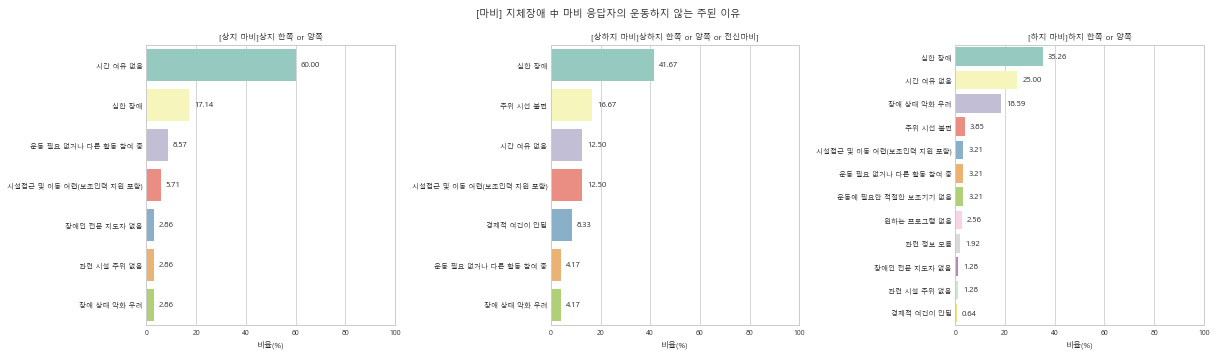

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3)
fig.set_size_inches(17, 5)

## ax1
colist1 = no_move3_high['운동하지 않는 주된 이유'].tolist()

splot1 = sns.barplot(data = no_move3_high, y = '운동하지 않는 주된 이유', x='pct', order = colist1, palette='Set3', ax=ax1)
ax1.set_title('[상지 마비]상지 한쪽 or 양쪽', size = 8)
ax1.set_ylabel('')
ax1.set_xlabel('비율(%)', size = 8)
ax1.tick_params(axis = 'x', labelsize =7)
ax1.tick_params(axis = 'y', labelsize =7)
ax1.set_xlim([0, 100])

for p in splot1.patches:
    ax1.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

## ax2
colist2 = no_move3_med['운동하지 않는 주된 이유'].tolist()

splot2 = sns.barplot(data = no_move3_med, y = '운동하지 않는 주된 이유', x='pct', order = colist2, palette='Set3', ax=ax2)
ax2.set_title('[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비]', size = 8)
ax2.set_ylabel('')
ax2.set_xlabel('비율(%)', size = 8)
ax2.tick_params(axis = 'x', labelsize =7)
ax2.tick_params(axis = 'y', labelsize =7)
ax2.set_xlim([0, 100])

for p in splot2.patches:
    ax2.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)
    
## ax3
colist3 = no_move3_low['운동하지 않는 주된 이유'].tolist()

splot3 = sns.barplot(data = no_move3_low, y = '운동하지 않는 주된 이유', x='pct', order = colist3, palette='Set3', ax=ax3)
ax3.set_title('[하지 마비]하지 한쪽 or 양쪽', size = 8)
ax3.set_ylabel('')
ax3.set_xlabel('비율(%)', size = 8)
ax3.tick_params(axis = 'x', labelsize = 7)
ax3.tick_params(axis = 'y', labelsize = 7)
ax3.set_xlim([0, 100])

for p in splot3.patches:
    ax3.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

plt.suptitle('[마비] 지체장애 中 마비 응답자의 운동하지 않는 주된 이유', size = 10)
#plt.gcf().subplots_adjust(bottom=0.19)
plt.tight_layout()
# plt.savefig('pyvisual/지체장애/마비/[마비]지체장애 中 마비 응답자의 운동하지 않는 주된 이유.png', dpi=300)
plt.show()

#### **관절장애**

In [109]:
no_move4 = pd.DataFrame(df4[['운동하지 않는 주된 이유', '가장 불편한 부위2']].loc[df4['건강관리운동'] == 2].groupby(['운동하지 않는 주된 이유', '가장 불편한 부위2'])['가장 불편한 부위2'].count()).add_suffix('_Count').reset_index()
no_move4

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count
0,1,[상지 관절장애]어깨~손가락,2
1,1,[하지 관절장애]고관절(엉덩이)~척추(디스크),16
2,2,[상지 관절장애]어깨~손가락,30
3,2,[하지 관절장애]고관절(엉덩이)~척추(디스크),218
4,3,[상지 관절장애]어깨~손가락,7
5,3,[하지 관절장애]고관절(엉덩이)~척추(디스크),25
6,4,[하지 관절장애]고관절(엉덩이)~척추(디스크),4
7,5,[상지 관절장애]어깨~손가락,2
8,5,[하지 관절장애]고관절(엉덩이)~척추(디스크),9
9,6,[하지 관절장애]고관절(엉덩이)~척추(디스크),8


In [110]:
no_reason = ['경제적 여건이 안됨', '시간 여유 없음', '시설접근 및 이동 어렵(보조인력 지원 포함)', '장애인 전문 지도자 없음', '원하는 프로그램 없음',
            '관련 정보 모름', '심한 장애', '관련 시설 주위 없음', '운동 필요 없거나 다른 활동 참여 중', '장애 상태 악화 우려', '주위 시선 불편',
            '운동에 필요한 적절한 보조기기 없음', '운동시설 등에서 받아주지 않음', '기타']

for i in range(len(no_reason)):
    no_move4.replace({'운동하지 않는 주된 이유': i+1}, {'운동하지 않는 주된 이유': no_reason[i]}, inplace=True)
no_move4.head()

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count
0,경제적 여건이 안됨,[상지 관절장애]어깨~손가락,2
1,경제적 여건이 안됨,[하지 관절장애]고관절(엉덩이)~척추(디스크),16
2,시간 여유 없음,[상지 관절장애]어깨~손가락,30
3,시간 여유 없음,[하지 관절장애]고관절(엉덩이)~척추(디스크),218
4,시설접근 및 이동 어렵(보조인력 지원 포함),[상지 관절장애]어깨~손가락,7


In [117]:
no_move4_high = no_move4.loc[no_move4['가장 불편한 부위2']=='[상지 관절장애]어깨~손가락'].sort_values(by='가장 불편한 부위2_Count', ascending = False)

no_move4_high['pct'] = round(no_move4_high['가장 불편한 부위2_Count'] / np.sum(no_move4_high['가장 불편한 부위2_Count'])*100, 2 )

no_move4_high.head()

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count,pct
2,시간 여유 없음,[상지 관절장애]어깨~손가락,30,44.12
4,시설접근 및 이동 어렵(보조인력 지원 포함),[상지 관절장애]어깨~손가락,7,10.29
10,심한 장애,[상지 관절장애]어깨~손가락,7,10.29
14,운동 필요 없거나 다른 활동 참여 중,[상지 관절장애]어깨~손가락,7,10.29
16,장애 상태 악화 우려,[상지 관절장애]어깨~손가락,6,8.82


In [118]:
no_move4_low = no_move4.loc[no_move4['가장 불편한 부위2']=='[하지 관절장애]고관절(엉덩이)~척추(디스크)'].sort_values(by='가장 불편한 부위2_Count', ascending = False)

no_move4_low['pct'] = round(no_move4_low['가장 불편한 부위2_Count'] / np.sum(no_move4_low['가장 불편한 부위2_Count'])*100, 2 )

no_move4_low.head()

,운동하지 않는 주된 이유,가장 불편한 부위2,가장 불편한 부위2_Count,pct
17,장애 상태 악화 우려,[하지 관절장애]고관절(엉덩이)~척추(디스크),238,29.75
3,시간 여유 없음,[하지 관절장애]고관절(엉덩이)~척추(디스크),218,27.25
11,심한 장애,[하지 관절장애]고관절(엉덩이)~척추(디스크),199,24.88
15,운동 필요 없거나 다른 활동 참여 중,[하지 관절장애]고관절(엉덩이)~척추(디스크),37,4.62
5,시설접근 및 이동 어렵(보조인력 지원 포함),[하지 관절장애]고관절(엉덩이)~척추(디스크),25,3.12


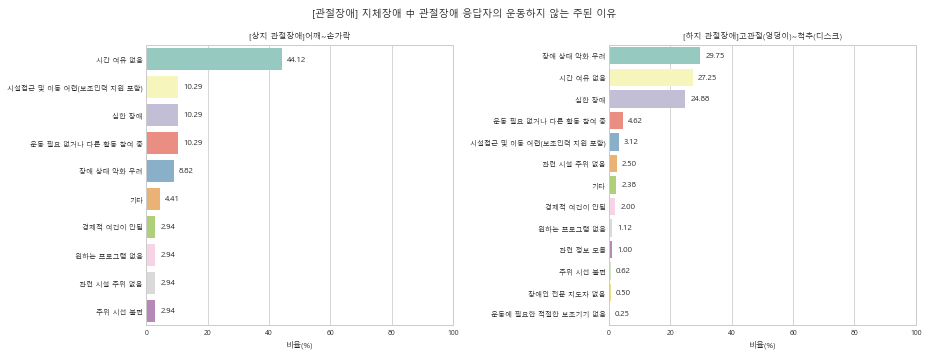

In [121]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(13, 5)

## ax1
colist1 = no_move4_high['운동하지 않는 주된 이유'].tolist()

splot1 = sns.barplot(data = no_move4_high, y = '운동하지 않는 주된 이유', x='pct', order = colist1, palette='Set3', ax=ax1)
ax1.set_title('[상지 관절장애]어깨~손가락', size = 8)
ax1.set_ylabel('')
ax1.set_xlabel('비율(%)', size = 8)
ax1.tick_params(axis = 'x', labelsize =7)
ax1.tick_params(axis = 'y', labelsize =7)
ax1.set_xlim([0, 100])

for p in splot1.patches:
    ax1.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

## ax2
colist2 = no_move4_low['운동하지 않는 주된 이유'].tolist()

splot2 = sns.barplot(data = no_move4_low, y = '운동하지 않는 주된 이유', x='pct', order = colist2, palette='Set3', ax=ax2)
ax2.set_title('[하지 관절장애]고관절(엉덩이)~척추(디스크)', size = 8)
ax2.set_ylabel('')
ax2.set_xlabel('비율(%)', size = 8)
ax2.tick_params(axis = 'x', labelsize = 7)
ax2.tick_params(axis = 'y', labelsize = 7)
ax2.set_xlim([0, 100])

for p in splot2.patches:
    ax2.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

plt.suptitle('[관절장애] 지체장애 中 관절장애 응답자의 운동하지 않는 주된 이유', size = 10)
plt.tight_layout()
# plt.savefig('pyvisual/지체장애/관절장애/[관절장애]지체장애 中 관절장애 응답자의 운동하지 않는 주된 이유.png', dpi=300)
plt.show()

---
## 운동하지 않는 이유 추가 탐색

### 이유: 주위 시선 불편

In [10]:
# 본인이 느끼는 차별 정도
df3[df3['가장 불편한 부위2'] == '[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비'].loc[df3['운동하지 않는 주된 이유']==11][['본인이 느끼는 차별 정도']]

,본인이 느끼는 차별 정도
695,2
2432,3
2751,2
4458,2


In [19]:
# 우리나라 장애인 차별 정도
df3[df3['가장 불편한 부위2'] == '[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비'].loc[df3['운동하지 않는 주된 이유']==11][['우리나라 장애인차별정도']]

,우리나라 장애인차별정도
695,4
2432,3
2751,3
4458,3


In [20]:
# 장애인 차별 금지법 인지
df3[df3['가장 불편한 부위2'] == '[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비'].loc[df3['운동하지 않는 주된 이유']==11][['장애인차별금지법 인지']]

,장애인차별금지법 인지
695,3
2432,2
2751,3
4458,2


In [21]:
# 사회적차별_지역사회생활(음식점, 극장, 공연장, 체육시설 등)
df3[df3['가장 불편한 부위2'] == '[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비'].loc[df3['운동하지 않는 주된 이유']==11][['사회적차별_지역사회생활']]

,사회적차별_지역사회생활
695,2
2432,2
2751,2
4458,2


In [17]:
df3[df3['가장 불편한 부위2'] == '[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비'].loc[df3['건강관리운동']==2]

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,가장 불편한 부위2
387,2,1,1,36,NaN,NaN,1,NaN,NaN,1,...,0,0,0,15,0,0,63,136.555743,0.347881,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
695,2,3,3,36,NaN,NaN,1,NaN,NaN,3,...,0,0,0,0,0,0,6,136.555743,0.347881,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
975,2,1,1,34,NaN,NaN,1,NaN,NaN,1,...,0,0,0,10,70,0,150,164.286874,0.418527,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
1350,2,1,1,32,NaN,NaN,1,NaN,NaN,1,...,0,14,0,0,0,0,22,155.130513,0.395201,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
1564,2,1,1,32,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,145.275638,0.370095,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
2165,2,3,3,38,NaN,NaN,1,NaN,NaN,3,...,0,0,43,6,0,0,99,120.858430,0.307892,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
2432,2,1,1,37,NaN,NaN,1,3.0,NaN,1,...,0,0,25,0,0,0,56,107.947423,0.275000,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
2521,2,5,5,11,NaN,NaN,1,NaN,NaN,5,...,0,0,0,0,0,0,16,675.990876,1.722113,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
2751,2,3,3,11,NaN,NaN,1,NaN,NaN,3,...,0,0,0,0,0,0,80,675.990876,1.722113,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
3097,2,3,2,38,2.0,3.0,1,6.0,NaN,3,...,0,0,0,0,0,0,75,730.523826,1.861038,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비


### 이유: 심한 장애와 장애 악화 우려

- 절단: 하지 절단
- 마비: 상하지 마비, 하지 마비
- 관절장애: 하지 관절장애

In [8]:
# 하지 절단 중 '심한 장애' 응답자의 장애정도 확인
df2[df2['가장 불편한 부위2']=='[하지 절단]양쪽 발가락~엉덩이 이상'].loc[df2['운동하지 않는 주된 이유']==7][['장애등급']].value_counts()

장애등급
3       8
4       6
2       2
5       2
1       1
dtype: int64

In [9]:
# 상하지 마비 중 '심한 장애' 응답자의 장애정도 확인
df3[df3['가장 불편한 부위2']=='[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비'].loc[df3['운동하지 않는 주된 이유']==7][['장애등급']].value_counts()

장애등급
1       4
2       4
3       2
dtype: int64

In [10]:
# 하지 마비 중 '심한 장애' 응답자의 장애정도 확인
df3[df3['가장 불편한 부위2']=='[하지 마비]하지 한쪽 or 양쪽'].loc[df3['운동하지 않는 주된 이유']==7][['장애등급']].value_counts()

장애등급
1       18
3       12
2       10
5        7
4        6
6        2
dtype: int64

In [11]:
# 하지 마비 중 '장애 상태 악화 우려' 응답자의 장애정도 확인
df3[df3['가장 불편한 부위2']=='[하지 마비]하지 한쪽 or 양쪽'].loc[df3['운동하지 않는 주된 이유']==10][['장애등급']].value_counts()

장애등급
3       9
4       7
5       5
1       4
2       3
6       1
dtype: int64

In [15]:
# 하지 관절장애 중 '장애 상태 악화 우려' 응답자의 장애정도 확인
df4[df4['가장 불편한 부위2']=='[하지 관절장애]고관절(엉덩이)~척추(디스크)'].loc[df4['운동하지 않는 주된 이유']==10][['장애등급']].value_counts()

장애등급
5       104
4        58
6        55
3        16
0         3
2         2
dtype: int64

In [14]:
# 하지 관절장애 중 '심한 장애' 응답자의 장애정도 확인
df4[df4['가장 불편한 부위2']=='[하지 관절장애]고관절(엉덩이)~척추(디스크)'].loc[df4['운동하지 않는 주된 이유']==7][['장애등급']].value_counts()

장애등급
5       57
4       46
6       37
3       22
0       15
2       14
1        8
dtype: int64

### 이유: 시간 여유 없음

- 절단: 상지 절단(1위, 48.94)
- 마비: 상지 마비(1위, 60%)
- 관절장애: 상지 관절장애(1위, 44.12%)

**상지 절단**

In [15]:
# 상지 절단 중 '시간 여유 없음' 응답자의 1주일 평균 근무일수 확인(69명)
high_cut_time = df2[df2['가장 불편한 부위2']=='[상지 절단]손목미만(손등, 손가락)~어깨 이상'].loc[df2['운동하지 않는 주된 이유']==2][['1주일 평균 근무일수','1일 평균 근무시간']]
high_cut_time.head()

,1주일 평균 근무일수,1일 평균 근무시간
102,5.0,8.0
132,5.0,8.0
237,7.0,13.0
329,6.0,6.0
439,6.0,10.0


In [16]:
# 상지 절단_시간 여유 없음_1주일 평균 근무일수_dataframe (비해당(0) 5건 제외)
hight_cut_week = pd.DataFrame(high_cut_time['1주일 평균 근무일수'].value_counts()).reset_index()
cond1 = (hight_cut_week['index'] != 0)
hight_cut_week = hight_cut_week.loc[cond1]

hight_cut_week['pct'] = round(hight_cut_week['1주일 평균 근무일수'] / hight_cut_week['1주일 평균 근무일수'].sum() *100, 2)
hight_cut_week

,index,1주일 평균 근무일수,pct
0,6.0,29,45.31
1,5.0,18,28.12
2,7.0,12,18.75
4,4.0,3,4.69
5,3.0,2,3.12


In [18]:
# 상지 절단_시간 여유 없음_1일 평균 근무시간_dataframe (비해당(0) 5건 제외)
hight_cut_hour = pd.DataFrame(high_cut_time['1일 평균 근무시간'].value_counts()).reset_index()
cond2 = (hight_cut_hour['index'] != 0)
hight_cut_hour = hight_cut_hour.loc[cond2]

hight_cut_hour['pct'] = round(hight_cut_hour['1일 평균 근무시간'] / hight_cut_hour['1일 평균 근무시간'].sum() *100, 2)
hight_cut_hour.head()

,index,1일 평균 근무시간,pct
0,8.0,22,34.38
1,10.0,16,25.00
2,9.0,6,9.38
4,12.0,4,6.25
5,7.0,3,4.69


In [19]:
hours = []
index_hour_int = list(map(int, hight_cut_hour['index'].tolist()))
index_hour_str = list(map(str, index_hour_int))
for i in range(len(index_hour_str)):
    hours.append(index_hour_str[i] + '시간')
    
print(hours)
hight_cut_hour['hours'] = hours
hight_cut_hour.sort_values(by = 'index', inplace=True)
hight_cut_hour

['8시간', '10시간', '9시간', '12시간', '7시간', '11시간', '6시간', '13시간', '5시간', '14시간', '3시간', '17시간']


,index,1일 평균 근무시간,pct,hours
11,3.0,1,1.56,3시간
9,5.0,2,3.12,5시간
7,6.0,3,4.69,6시간
5,7.0,3,4.69,7시간
0,8.0,22,34.38,8시간
2,9.0,6,9.38,9시간
1,10.0,16,25.00,10시간
6,11.0,3,4.69,11시간
4,12.0,4,6.25,12시간
8,13.0,2,3.12,13시간


In [20]:
hight_cut_hour['1일 평균 근무시간'].sum()

64

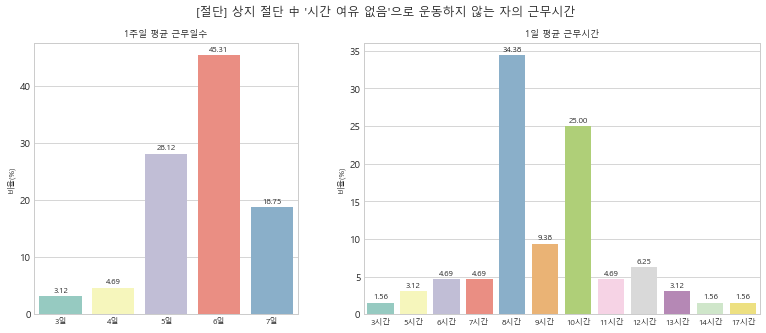

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1.5]})
fig.set_size_inches(13, 5)

splot1 = sns.barplot(data = hight_cut_week, x = 'index', y = 'pct', palette='Set3', ax=ax1)

for bar in splot1.patches: # value label 생성
    ax1.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

ax1.set_title('1주일 평균 근무일수', size = 9)
ax1.set_xlabel('')
ax1.set_ylabel('비율(%)', size = 8)
ax1.set_xticklabels(['3일', '4일', '5일', '6일', '7일'], size = 8) # 이름 및 크기 설정

splot2 = sns.barplot(data = hight_cut_hour, x = 'hours', y = 'pct', palette='Set3', ax=ax2)

for bar in splot2.patches: # value label 생성
    ax2.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

ax2.set_title('1일 평균 근무시간', size = 9)
ax2.set_xlabel('')
ax2.set_ylabel('비율(%)', size = 8)
ax2.set_xticklabels(hight_cut_hour['hours'].tolist(),size = 8) # 이름 및 크기 설정

plt.suptitle("[절단] 상지 절단 中 '시간 여유 없음'으로 운동하지 않는 자의 근무시간")
# plt.savefig("pyvisual/지체장애/절단/[절단]상지 절단 中 '시간 여유 없음'으로 운동하지 않는 자의 근무시간.png", dpi=300)
plt.show()

In [24]:
# 상지 절단 중 직장생활시 애로사항 1순위
df2[df2['가장 불편한 부위2']=='[상지 절단]손목미만(손등, 손가락)~어깨 이상'].loc[df2['운동하지 않는 주된 이유']==2][['직장생활시 애로사항-1순위']].value_counts()

직장생활시 애로사항-1순위
1                 29
13                18
4                 13
0                  5
2                  2
8                  1
14                 1
dtype: int64

In [25]:
# 상지 절단 중 직장생활시 애로사항 2순위
df2[df2['가장 불편한 부위2']=='[상지 절단]손목미만(손등, 손가락)~어깨 이상'].loc[df2['운동하지 않는 주된 이유']==2][['직장생활시 애로사항-2순위']].value_counts()

직장생활시 애로사항-2순위
0                 23
4                 18
13                18
1                  5
8                  2
5                  1
6                  1
12                 1
dtype: int64

In [211]:
cond = (df2['직장생활시 애로사항-1순위'] !=0)
high_cut_problems = df2[df2['가장 불편한 부위2']=='[상지 절단]손목미만(손등, 손가락)~어깨 이상'].loc[df2['운동하지 않는 주된 이유']==2][['직장생활시 애로사항-1순위', '직장생활시 애로사항-2순위']]
high_cut_problems = high_cut_problems.loc[cond]
high_cut_problems

,직장생활시 애로사항-1순위,직장생활시 애로사항-2순위
102,13,0
132,13,0
237,1,4
329,1,4
439,4,8
...,...,...
6336,13,0
6384,1,6
6457,8,4
6507,1,13


**상지 마비**

In [30]:
# 상지 마비 중 '시간 여유 없음' 응답자의 1주일 평균 근무일수 확인(21명)
high_paralysis_time = df3[df3['가장 불편한 부위2']=='[상지 마비]상지 한쪽 or 양쪽'].loc[df3['운동하지 않는 주된 이유']==2][['1주일 평균 근무일수','1일 평균 근무시간']]
high_paralysis_time.head()

,1주일 평균 근무일수,1일 평균 근무시간
253,6.0,8.0
337,5.0,10.0
481,6.0,9.0
972,7.0,10.0
1208,4.0,10.0


In [31]:
# 상지 마비_시간 여유 없음_1주일 평균 근무일수_dataframe (비해당(0) 1건 제외)
high_paralysis_week = pd.DataFrame(high_paralysis_time['1주일 평균 근무일수'].value_counts()).reset_index()
cond1 = (high_paralysis_week['index'] != 0)
high_paralysis_week = high_paralysis_week.loc[cond1]

high_paralysis_week['pct'] = round(high_paralysis_week['1주일 평균 근무일수'] / high_paralysis_week['1주일 평균 근무일수'].sum() *100, 2)
high_paralysis_week

,index,1주일 평균 근무일수,pct
0,6.0,7,35.0
1,5.0,6,30.0
2,4.0,3,15.0
3,3.0,2,10.0
4,7.0,2,10.0


In [32]:
# 상지 마비_시간 여유 없음_1일 평균 근무시간_dataframe (비해당(0) 1건 제외)
high_paralysis_hour = pd.DataFrame(high_paralysis_time['1일 평균 근무시간'].value_counts()).reset_index()
cond2 = (high_paralysis_hour['index'] != 0)
high_paralysis_hour = high_paralysis_hour.loc[cond2]

high_paralysis_hour['pct'] = round(high_paralysis_hour['1일 평균 근무시간'] / high_paralysis_hour['1일 평균 근무시간'].sum() *100, 2)
high_paralysis_hour.head()

,index,1일 평균 근무시간,pct
0,10.0,9,45.0
1,12.0,3,15.0
2,9.0,3,15.0
3,8.0,2,10.0
4,5.0,1,5.0


In [33]:
hours = []
index_hour_int = list(map(int, high_paralysis_hour['index'].tolist()))
index_hour_str = list(map(str, index_hour_int))
for i in range(len(index_hour_str)):
    hours.append(index_hour_str[i] + '시간')
    
print(hours)
high_paralysis_hour['hours'] = hours
high_paralysis_hour.sort_values(by = 'index', inplace=True)
high_paralysis_hour

['10시간', '12시간', '9시간', '8시간', '5시간', '15시간', '6시간']


,index,1일 평균 근무시간,pct,hours
4,5.0,1,5.0,5시간
6,6.0,1,5.0,6시간
3,8.0,2,10.0,8시간
2,9.0,3,15.0,9시간
0,10.0,9,45.0,10시간
1,12.0,3,15.0,12시간
5,15.0,1,5.0,15시간


In [34]:
high_paralysis_hour['1일 평균 근무시간'].sum()

20

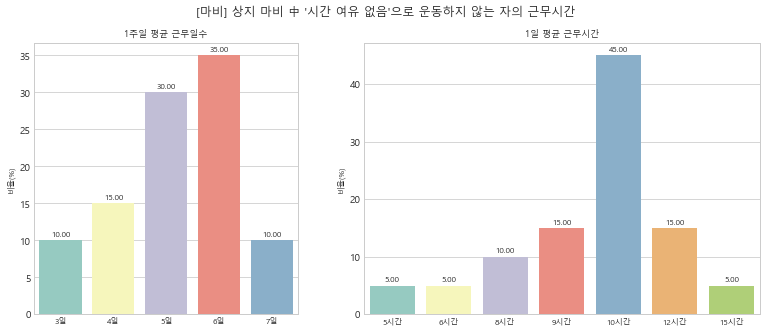

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1.5]})
fig.set_size_inches(13, 5)

splot1 = sns.barplot(data = high_paralysis_week, x = 'index', y = 'pct', palette='Set3', ax=ax1)

for bar in splot1.patches: # value label 생성
    ax1.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

ax1.set_title('1주일 평균 근무일수', size = 9)
ax1.set_xlabel('')
ax1.set_ylabel('비율(%)', size = 8)
ax1.set_xticklabels(['3일', '4일', '5일', '6일', '7일'], size = 8) # 이름 및 크기 설정

splot2 = sns.barplot(data = high_paralysis_hour, x = 'hours', y = 'pct', palette='Set3', ax=ax2)

for bar in splot2.patches: # value label 생성
    ax2.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

ax2.set_title('1일 평균 근무시간', size = 9)
ax2.set_xlabel('')
ax2.set_ylabel('비율(%)', size = 8)
ax2.set_xticklabels(high_paralysis_hour['hours'].tolist(),size = 8) # 이름 및 크기 설정

plt.suptitle("[마비] 상지 마비 中 '시간 여유 없음'으로 운동하지 않는 자의 근무시간")
# plt.savefig("pyvisual/지체장애/마비/[마비]상지 절단 中 '시간 여유 없음'으로 운동하지 않는 자의 근무시간.png", dpi=300)
plt.show()

In [44]:
# 상지 마비 중 직장생활시 애로사항 1순위
df3[df3['가장 불편한 부위2']=='[상지 마비]상지 한쪽 or 양쪽'].loc[df3['운동하지 않는 주된 이유']==2][['직장생활시 애로사항-1순위']].value_counts()

직장생활시 애로사항-1순위
1                 10
4                  6
13                 4
0                  1
dtype: int64

In [45]:
# 상지 마비 중 직장생활시 애로사항 2순위
df3[df3['가장 불편한 부위2']=='[상지 마비]상지 한쪽 or 양쪽'].loc[df3['운동하지 않는 주된 이유']==2][['직장생활시 애로사항-2순위']].value_counts()

직장생활시 애로사항-2순위
13                6
0                 5
1                 4
4                 3
5                 2
14                1
dtype: int64

**상지 관절장애**

In [49]:
# 상지 관절장애 중 '시간 여유 없음' 응답자의 1주일 평균 근무일수 확인(30명)
high_joint_time = df4[df4['가장 불편한 부위2']=='[상지 관절장애]어깨~손가락'].loc[df4['운동하지 않는 주된 이유']==2][['1주일 평균 근무일수','1일 평균 근무시간']]
high_joint_time.head()

,1주일 평균 근무일수,1일 평균 근무시간
433,5.0,8.0
575,5.0,8.0
780,0.0,0.0
954,6.0,8.0
1011,7.0,8.0


In [51]:
# 상지 관절장애_시간 여유 없음_1주일 평균 근무일수_dataframe (비해당(0) 2건 제외)
high_joint_week = pd.DataFrame(high_joint_time['1주일 평균 근무일수'].value_counts()).reset_index()
cond1 = (high_joint_week['index'] != 0)
high_joint_week = high_joint_week.loc[cond1]

high_joint_week['pct'] = round(high_joint_week['1주일 평균 근무일수'] / high_joint_week['1주일 평균 근무일수'].sum() *100, 2)
high_joint_week

,index,1주일 평균 근무일수,pct
0,6.0,12,42.86
1,5.0,9,32.14
2,7.0,3,10.71
3,4.0,2,7.14
5,3.5,1,3.57
6,3.0,1,3.57


In [52]:
# 상지 관절장애_시간 여유 없음_1일 평균 근무시간_dataframe (비해당(0) 2건 제외)
high_joint_hour = pd.DataFrame(high_joint_time['1일 평균 근무시간'].value_counts()).reset_index()
cond2 = (high_joint_hour['index'] != 0)
high_joint_hour = high_joint_hour.loc[cond2]

high_joint_hour['pct'] = round(high_joint_hour['1일 평균 근무시간'] / high_joint_hour['1일 평균 근무시간'].sum() *100, 2)
high_joint_hour.head()

,index,1일 평균 근무시간,pct
0,8.0,15,53.57
1,10.0,8,28.57
3,12.0,2,7.14
4,16.0,1,3.57
5,6.0,1,3.57


In [53]:
hours = []
index_hour_int = list(map(int, high_joint_hour['index'].tolist()))
index_hour_str = list(map(str, index_hour_int))
for i in range(len(index_hour_str)):
    hours.append(index_hour_str[i] + '시간')
    
print(hours)
high_joint_hour['hours'] = hours
high_joint_hour.sort_values(by = 'index', inplace=True)
high_joint_hour

['8시간', '10시간', '12시간', '16시간', '6시간', '9시간']


,index,1일 평균 근무시간,pct,hours
5,6.0,1,3.57,6시간
0,8.0,15,53.57,8시간
6,9.0,1,3.57,9시간
1,10.0,8,28.57,10시간
3,12.0,2,7.14,12시간
4,16.0,1,3.57,16시간


In [54]:
high_joint_hour['1일 평균 근무시간'].sum()

28

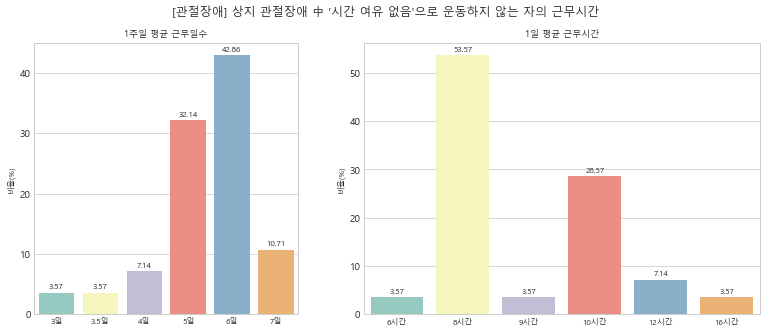

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1.5]})
fig.set_size_inches(13, 5)

splot1 = sns.barplot(data = high_joint_week, x = 'index', y = 'pct', palette='Set3', ax=ax1)

for bar in splot1.patches: # value label 생성
    ax1.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

ax1.set_title('1주일 평균 근무일수', size = 9)
ax1.set_xlabel('')
ax1.set_ylabel('비율(%)', size = 8)
ax1.set_xticklabels(['3일', '3.5일', '4일', '5일', '6일', '7일'], size = 8) # 이름 및 크기 설정

splot2 = sns.barplot(data = high_joint_hour, x = 'hours', y = 'pct', palette='Set3', ax=ax2)

for bar in splot2.patches: # value label 생성
    ax2.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

ax2.set_title('1일 평균 근무시간', size = 9)
ax2.set_xlabel('')
ax2.set_ylabel('비율(%)', size = 8)
ax2.set_xticklabels(high_joint_hour['hours'].tolist(),size = 8) # 이름 및 크기 설정

plt.suptitle("[관절장애] 상지 관절장애 中 '시간 여유 없음'으로 운동하지 않는 자의 근무시간")
plt.savefig("pyvisual/지체장애/관절장애/[관절장애]상지 관절장애 中 '시간 여유 없음'으로 운동하지 않는 자의 근무시간.png", dpi=300)
plt.show()

In [63]:
# 상지 관절장애 중 직장생활시 애로사항 1순위
df4[df4['가장 불편한 부위2']=='[상지 관절장애]어깨~손가락'].loc[df4['운동하지 않는 주된 이유']==2][['직장생활시 애로사항-1순위']].value_counts()

직장생활시 애로사항-1순위
1                 10
13                 9
4                  7
0                  2
2                  1
5                  1
dtype: int64

In [64]:
# 상지 관절장애 중 직장생활시 애로사항 2순위
df4[df4['가장 불편한 부위2']=='[상지 관절장애]어깨~손가락'].loc[df4['운동하지 않는 주된 이유']==2][['직장생활시 애로사항-2순위']].value_counts()

직장생활시 애로사항-2순위
0                 11
13                 5
1                  4
4                  3
2                  2
6                  2
8                  2
7                  1
dtype: int64